## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [5]:
series = 13
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [6]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4', '16'],
    'data_type': 'audio',
    'max_batch_size': ['1', '4'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_vairants': [   'facebook/s2t-small-librispeech-asr',
                          'facebook/s2t-medium-librispeech-asr',
                          'facebook/s2t-large-librispeech-asr'],
    'node_name': 'audio',
    'pipeline_name': '2-paper-audio-sent',
    'repetition': 2,
    'replicas': [1],
    'series': 13,
    'series_meta': 'checking effect of changing everything,\\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 180,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 10]},
    'workload_type': 'static'}


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-small-librispeech-asr,1,3.846413,241.326408,3.001340
1,facebook/s2t-small-librispeech-asr,1,3.550056,975.644787,2.895757
2,facebook/s2t-small-librispeech-asr,1,4.768839,557.425450,3.126983
3,facebook/s2t-small-librispeech-asr,1,NaN,2795.416824,NaN
4,facebook/s2t-small-librispeech-asr,1,0.508234,60.441673,0.391237
5,facebook/s2t-small-librispeech-asr,1,0.471942,482.936664,0.366357
6,facebook/s2t-small-librispeech-asr,1,0.489807,1410.730783,0.407698
7,facebook/s2t-small-librispeech-asr,1,0.463545,5325.283399,0.396162
8,facebook/s2t-small-librispeech-asr,4,6.418328,128.072996,4.057916
9,facebook/s2t-small-librispeech-asr,4,5.499264,633.993156,3.990589


Text(0, 0.5, 'Latency (seconds)')

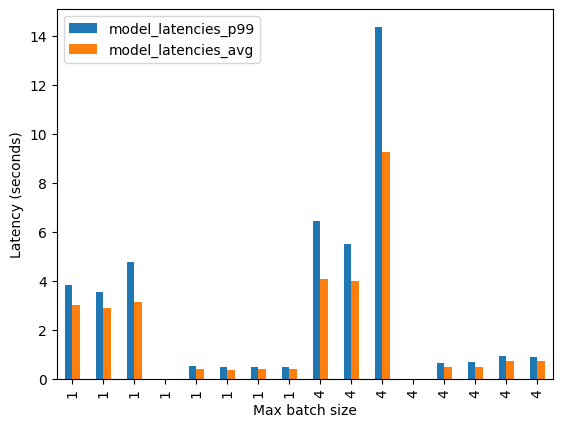

In [8]:
model_variant = 'facebook/s2t-small-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-medium-librispeech-asr,1,10.971460,652.898337,7.611240
1,facebook/s2t-medium-librispeech-asr,1,11.185836,2549.670372,7.669983
2,facebook/s2t-medium-librispeech-asr,1,8.117212,638.043908,4.451849
3,facebook/s2t-medium-librispeech-asr,1,NaN,2801.865789,NaN
4,facebook/s2t-medium-librispeech-asr,1,0.615369,74.870649,0.480757
5,facebook/s2t-medium-librispeech-asr,1,0.569145,554.079101,0.453066
6,facebook/s2t-medium-librispeech-asr,1,0.621250,1980.340151,0.525745
7,facebook/s2t-medium-librispeech-asr,1,0.586929,6904.225082,0.492404
8,facebook/s2t-medium-librispeech-asr,4,8.495181,252.642160,6.156805
9,facebook/s2t-medium-librispeech-asr,4,9.299407,938.379040,6.916994


Text(0, 0.5, 'Latency (seconds)')

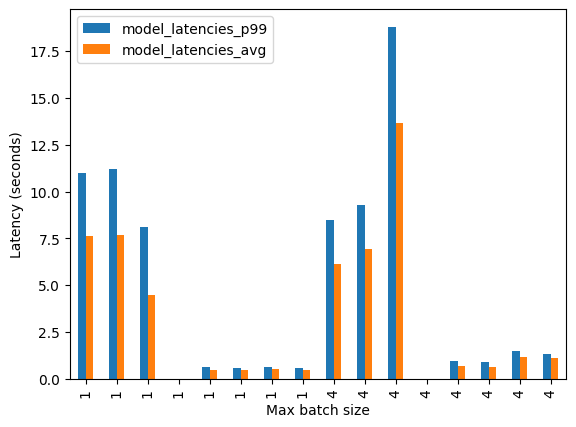

In [10]:
model_variant = 'facebook/s2t-medium-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-large-librispeech-asr,1,16.865975,571.858074,8.231648
1,facebook/s2t-large-librispeech-asr,1,14.330834,2653.937223,8.283550
2,facebook/s2t-large-librispeech-asr,1,33.878349,578.538228,18.106368
3,facebook/s2t-large-librispeech-asr,1,NaN,2833.590060,NaN
4,facebook/s2t-large-librispeech-asr,1,1.439435,131.963514,0.880444
5,facebook/s2t-large-librispeech-asr,1,1.019903,969.113398,0.819807
6,facebook/s2t-large-librispeech-asr,1,1.461402,2189.967828,0.939767
7,facebook/s2t-large-librispeech-asr,1,1.008592,11190.104374,0.838404
8,facebook/s2t-large-librispeech-asr,4,16.802815,558.941775,11.134069
9,facebook/s2t-large-librispeech-asr,4,15.568942,1887.430475,10.973510


Text(0, 0.5, 'Latency (seconds)')

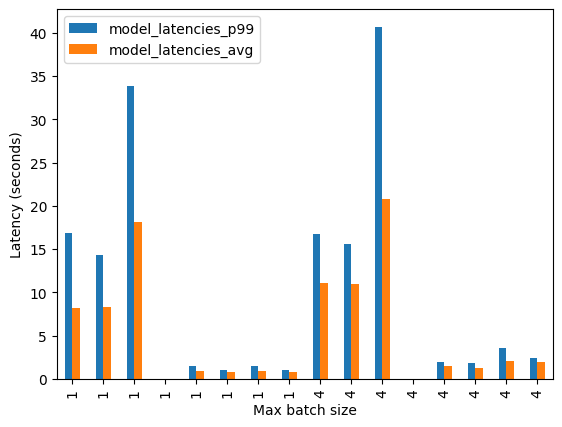

In [11]:
model_variant = 'facebook/s2t-large-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

In [9]:
# TODO 3D images here